In [3]:
import cv2
import insightface
import onnxruntime

In [4]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis

# Инициализация модели для CPU
app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(320, 320))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/pavelzinkevich/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/pavelzinkevich/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/pavelzinkevich/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/pavelzinkevich/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/pavelzinkevich/.insightface/models/buffalo_l/w600k_r50.onnx rec

In [5]:
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Получаем лица и лендмарки
#     faces = app.get(frame)
#     for face in faces:
#         # Рисуем bounding box
#         bbox = face.bbox.astype(int)
#         cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

#         # Рисуем лендмарки лица (106 точек)
#         for x, y in face.landmark_2d_106:
#             cv2.circle(frame, (int(x), int(y)), 1, (0, 0, 255), -1)

#     cv2.imshow("Face Mesh (InsightFace)", frame)

#     # Выход по ESC
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samithsachidanandan/human-face-emotions")

print("Path to dataset files:", path)

/Users/pavelzinkevich/Desktop/programs/faceapp/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/pavelzinkevich/.cache/kagglehub/datasets/samithsachidanandan/human-face-emotions/versions/2


In [7]:
kaggle_path = "/Users/pavelzinkevich/.cache/kagglehub/datasets/samithsachidanandan/human-face-emotions/versions/2/Data"

In [8]:
import os

# Посмотреть файлы в скачанной папке
files = os.listdir(kaggle_path)
print("Файлы в датасете:", files)

Файлы в датасете: ['Happy', 'Sad', 'Fear', 'Angry', 'Suprise']


In [9]:
import os

# Посмотреть файлы в скачанной папке
files = os.listdir(kaggle_path+"/Happy")
print("Файл в датасете:", files[0])

Файл в датасете: 973347339.png


Найдено лиц: 1


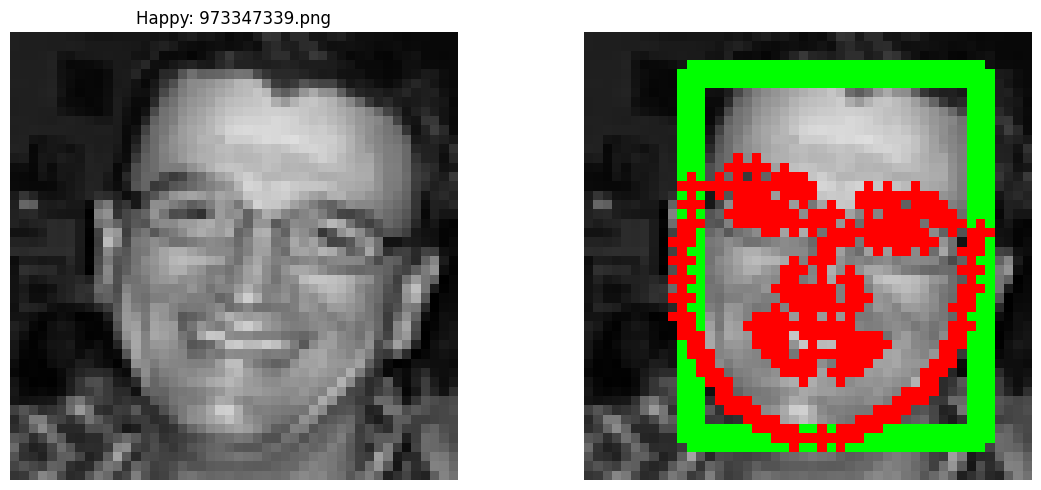

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
if files:
    first_image_path = os.path.join(kaggle_path+"/Happy", files[0])
    # img = Image.open(first_iamge_path)
    # img.show()
    img = cv2.imread(first_image_path)
    faces = app.get(img) 
        # Отрисовка результатов
    result_img = img.copy()
    for face in faces:
        # Bounding box
        bbox = face.bbox.astype(int)
        cv2.rectangle(result_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
        
        # Лендмарки
        for x, y in face.landmark_2d_106:
            cv2.circle(result_img, (int(x), int(y)), 1, (0, 0, 255), -1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Happy: {files[0]}")
    print(f"Найдено лиц: {len(faces)}")

    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()

    # Показать результат
    cv2.imshow("Detected Faces", img)
    